Spatial Working Memory Implementation of (Compte et. al.)
===============================================

Excersise from the book *Neuronal Dynamics
From single neurons to networks and models of cognition*, Chapter 18, 
by Wulfram Gerstner, Werner M. Kistler, Richard Naud and Liam Paninski

Detailed excersise page: https://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/spatial-working-memory.html

The model has been introduced by Compte et. al. [1]. The parameters used here differ from the original paper. They are changed such that we can still study some effects while simulating a small network.

[1] Compte, A., Brunel, N., Goldman-Rakic, P. S., & Wang, X. J. (2000). Synaptic mechanisms and network dynamics underlying spatial working memory in a cortical network model. Cerebral Cortex, 10(9), 910-923.

In [1]:
# Load libraries

# Compatibility between Python 2 and Python 3
from __future__ import division, print_function, unicode_literals, absolute_import

%matplotlib inline
import math
import numpy as np
from brian2 import *

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from neurodynex.working_memory_network import wm_model
from neurodynex.working_memory_network import wm_model_modified
from neurodynex.tools import plot_tools

from utility_functions import *

collected_data_file = 'Data/collected_drift_trials.npy' # The file to store the collected trials data

Example Run of the Spatial Working Memory Ring Attractor and Plotting
----------------------------------------------------------------------

INFO       width adjusted from 1. ms to 1.1 ms [brian2.monitors.ratemonitor.adjusted_width]


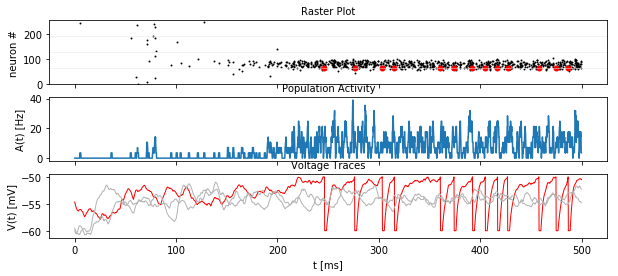

In [2]:
# Run the default model in the package
# N_excitatory=256, N_inhibitory=64, weight_scaling_factor=8.0
wm_model.getting_started()

**Figure caption:**

_Top:_ A weak stimulus, centered at 120deg, is applied to a subset of the excitatory population from t=100ms to t=300ms. This creates an activity bump in the excitatory subpopulation. The activity is sustained after the end of the stimulation. 

_Middle:_ The population activity increases over time while the stimulus is applied. 

_Bottom:_ Voltage traces for three selected neurons. The spikes of the red neuron are visible in the top and bottom panel.

Run the simulation for custom ring attractor parameters
------------------------------------------------------------------

N_excitatory=1024, N_inhibitory=256, N_extern_poisson=1000, weight_scaling_factor=2.0, stimulus_center_deg=180, stimulus_width_deg=40, stimulus_strength=70. * pamp, t_stimulus_start=0. * second, t_stimulus_duration=0. * second

(<Figure size 720x288 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x119798590>)

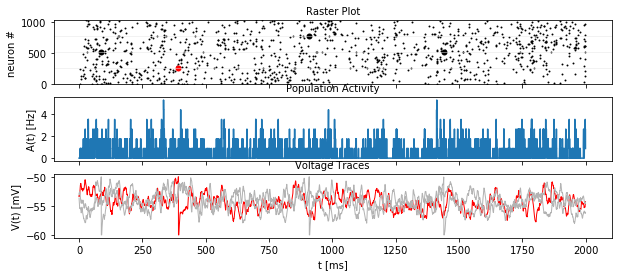

In [3]:
# Run with unstructured Poisson input (all neurons receive similar activity)
sim_time_duration    = 2000. * ms
poisson_firing_rate  = 1.3 * Hz
sigma_weight_profile = 20.
Jpos_excit2excit     = 1.6
t_stimulus_start=0*ms
t_stimulus_duration=0*ms

rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, weight_profile_45 = wm_model.simulate_wm(sim_time=sim_time_duration, poisson_firing_rate=poisson_firing_rate, sigma_weight_profile=sigma_weight_profile, Jpos_excit2excit=Jpos_excit2excit, t_stimulus_start=t_stimulus_start, t_stimulus_duration=t_stimulus_duration)
plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * ms)

(<Figure size 720x288 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x11aedec10>)

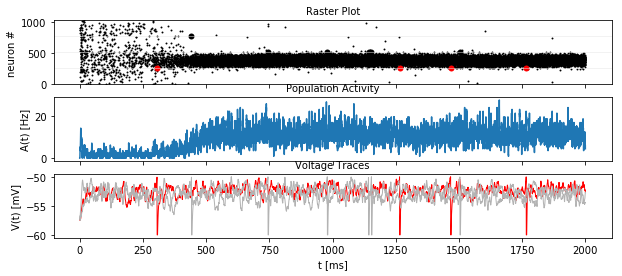

In [4]:
# Run with unstructured Poisson input of higher impulse rate (all neurons receive similar activity)
sim_time_duration    = 2000. * ms
poisson_firing_rate  = 2.3 * Hz
sigma_weight_profile = 20.
Jpos_excit2excit     = 1.6
t_stimulus_start=0*ms
t_stimulus_duration=0*ms

rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, weight_profile_45 = wm_model.simulate_wm(sim_time=sim_time_duration, poisson_firing_rate=poisson_firing_rate, sigma_weight_profile=sigma_weight_profile, Jpos_excit2excit=Jpos_excit2excit, t_stimulus_start=t_stimulus_start, t_stimulus_duration=t_stimulus_duration)
plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * ms)

**12.1.2. Question: Unstructured input: Change the firing rate of the external population to 2.2Hz. Run the simulation a few times. What do you observe?**
I observe that by increasing the stimulus firing rate from 1.3Hz to 2.3Hz, even though all neurons receive similar spiking activity, an activity 'bump' starts forming eventually around 750ms from the start fo the simulation. The activity 'bump' is formed at a random theta direction. The strange thing is according to the documendation the stimulus has duration of 0s. The plot however indicates higher spiking rate in all neurons which seems to be adequate condition for a spontaneous activity 'bump' to be formed just by chance. Another observation is that by increasing the external input firing rate to 1.4Hz is *occasionally* sufficient to cause an activity 'bump' but it takes more time to do so (around 2s-3s of simulation). That is 1.4Hz -> 3s, 1.8Hz -> 0.5s-1.25s, 2.0Hz -> 0.75s, 2.3Hz -> 0.75s. It seems that the more noise in the input signal the more likely that a spontaneous activity 'bump' will be formed.

**Strange behaviour:** The poisson\_firing\_rate seems to be applied during the whole duration of the simulation when both t\_stimulus\_start and t\_stimulus\_duration are set to 0ms. In this case the activity 'bump' is formed at a time depending on the poisson\_firing\_rate value. However if we limit the t\_stimulus\_duration to say 100ms then an activity 'bump' is formed immediatelly regardless of the poisson_firing_rate value being 1.3Hz or 2.3Hz. 

Investigate synaptic strength profile
------------------------------------------

### Plotting of the synaptic strengths profile of neuron tuned at 45deg

Let's plot the synaptic strengths of all input synapses of a neuron tuned to 45deg. The synaptic strength from each presynaptic neuron to a postsynaptic neuron tuned to the preferred direction of 45deg are displayed. 

Text(0,0.5,u'Synaptic strength')

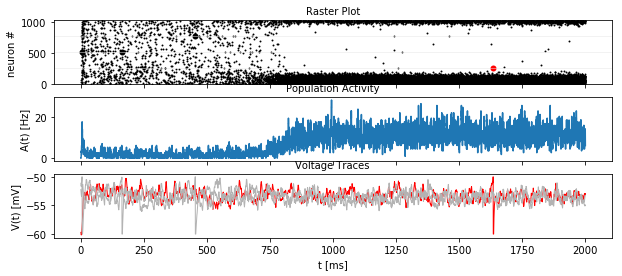

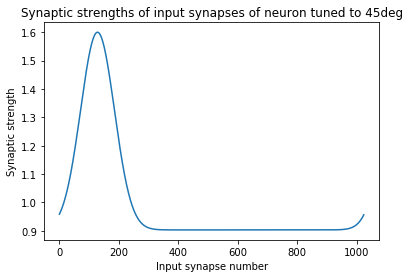

In [6]:
sim_time_duration    = 2000. * ms
poisson_firing_rate  = 2.3 * Hz
sigma_weight_profile = 20.
Jpos_excit2excit     = 1.6
t_stimulus_start=0*ms
t_stimulus_duration=0*ms

rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, weight_profile_45 = wm_model.simulate_wm(sim_time=sim_time_duration, poisson_firing_rate=poisson_firing_rate, sigma_weight_profile=sigma_weight_profile, Jpos_excit2excit=Jpos_excit2excit, t_stimulus_start=t_stimulus_start, t_stimulus_duration=t_stimulus_duration)
plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * ms)

plt.figure()
plt.plot(weight_profile_45)
plt.title('Synaptic strengths of input synapses of neuron tuned to 45deg')
plt.xlabel('Input synapse number')
plt.ylabel('Synaptic strength')

**Figure caption:**

Synaptic profile of one postsynaptic neuron tuned to preferred direction 45deg. Vertical axis (ordinate) is the synaptic strength of each presynaptic neuron connecting to this postsynaptic neuron. Horizontal axis (abscissa) is the presynaptic neuron ID. 

**12.1.3. Question: Weight profile: What is the effect of Jpos\_excit2excit and sigma\_weight\_profile?** 

Changing Jpos\_excit2excit determines the amplitude (max value) of the synaptic strength distribution. With higher value of Jpos\_excit2excit a spontaneous activity 'bump' is more likely to be formed and earlier. 

Changing sigma\_weight\_profile affects the Standard Deviation (with) of the gaussian excitatory synaptic strength distribution. The higher the value of sigma\_weight\_profile the wider the synaptic strength distribution width and the wider the activity 'bump'. With higher value of sigma\_weight\_profile a spontaneous activity 'bump' is more likely to be formed and earlier.

Response to Structured Input Stimulus
---------------------------------------------

We now apply stimulation to a subset of the excitatory population of neurons.

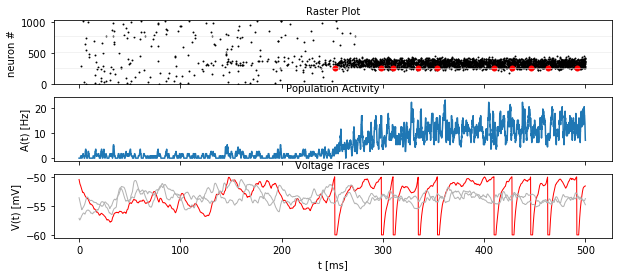

In [7]:
stimulus_center_deg=120
stimulus_width_deg=30
stimulus_strength=.06 * namp
t_stimulus_start=100. * ms
t_stimulus_duration=200. * ms
sim_time_duration=500. * ms

rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(stimulus_center_deg=stimulus_center_deg, stimulus_width_deg=stimulus_width_deg, stimulus_strength=stimulus_strength, t_stimulus_start=t_stimulus_start, t_stimulus_duration=t_stimulus_duration, sim_time=sim_time_duration)
fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * ms)
plt.show()

**12.2.1. Question: Integration of input:**

**At which time can you identify a change in the population activity?** 
You can see a change in the spiking activity of the stimulated subset of the neurons shortly after the current injection is applied (t=100ms) but the activity 'bump' is only getting strong and sustained at t=200ms that is 100ms after the commencment of the current injection. 

**Increase the stimulus strength to 0.5namp. What happens when the stimulus stops?** 
Now the activity 'bump' starts almost as soon as the current injection starts at t=100ms. With that level of stimulus there is a drop is the population average activity when the stimulus stops. 

**Increase the stimulus width to 60deg (stimulus_strength=0.1 * b2.namp, stimulus center = 120deg). How does the bump shape change?**
The activity 'bump' however is wider during the stimulation and then returns to normal activity 'bump' width.

**12.2.2. Question: Role of the inhibitory population:** 

**Remove the inhibitory population by setting its size to the minimal size N_inhibitory = 1. Describe your observations.**
Without the inhibitory population all excitatory neurons fire and there is a periodic oscilation of activity. 

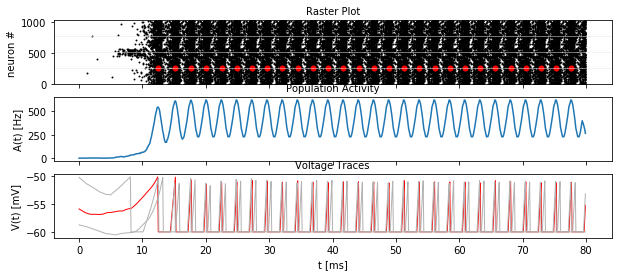

In [8]:
N_inhibitory = 1
stimulus_strength=0.65 * namp
t_stimulus_start=5 * ms
t_stimulus_duration=25 * ms
sim_time_duration=80. * ms

rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(N_inhibitory = N_inhibitory, stimulus_strength=stimulus_strength, t_stimulus_start=t_stimulus_start, t_stimulus_duration=t_stimulus_duration, sim_time=sim_time_duration)
fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * ms)
plt.show()

**12.2.2. Question: Role of the inhibitory population:** 
**Plot the raster plot of population activity and voltage traces for the inhibitory population.**

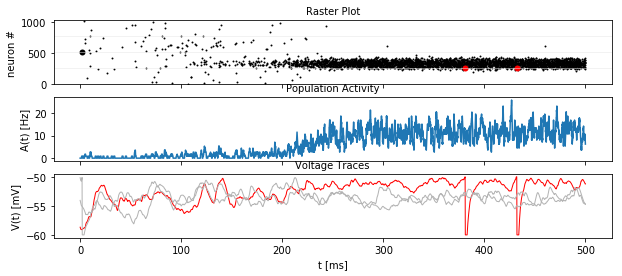

Text(0,0.5,u'Inhibitory Neuron ID')

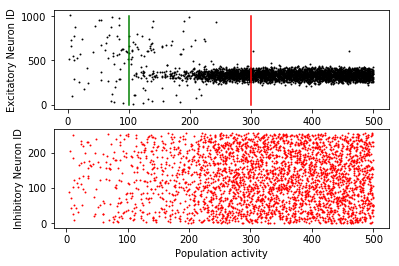

In [9]:
stimulus_center_deg=120
stimulus_width_deg=30
stimulus_strength=.06 * namp
t_stimulus_start=100 * ms
t_stimulus_duration=200 * ms
sim_time_duration=500. * ms

rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(stimulus_center_deg=stimulus_center_deg, stimulus_width_deg=stimulus_width_deg, stimulus_strength=stimulus_strength, t_stimulus_start=t_stimulus_start, t_stimulus_duration=t_stimulus_duration, sim_time=sim_time_duration)
fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * ms)
plt.show()


plt.figure()
ax1 = plt.subplot('211')
ax2 = plt.subplot('212')
ax1.scatter(spike_monitor_excit.t/ms, spike_monitor_excit.i,
                              marker=".", c="k", s=15, lw=0)
ax2.scatter(spike_monitor_inhib.t/ms, spike_monitor_inhib.i,
                              marker=".", c="r", s=15, lw=0)
ax1.plot([100,100], [0,1000], 'g')
ax1.plot([300,300], [0,1000], 'r')
plt.xlabel('Population activity')
ax1.set_ylabel('Excitatory Neuron ID')
ax2.set_ylabel('Inhibitory Neuron ID')

**Figure caption:**

Top: The raster plot of the excitatory neuronal population with greed and red verticla lines indicating the commencement and end of the stimulus.

Bottom: The raster plot of the inhibitory neuronal population activity.

12.3. Exercise: Decoding the population activity into a population vector
------------------------------------------------------------------------------------



In [4]:
#t = 400*ms
#t_delta = 10*ms
#tmin = t - t_delta
#tmax = t + t_delta
#get_spike_count(spike_monitor_excit, np.arange(0,1024).tolist(), tmin, tmax)

Text(0,0.5,u'Spike rate [Hz]')

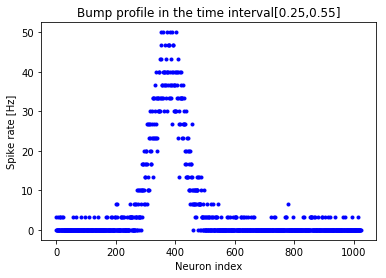

In [5]:
t = 400*ms  # time point of interest
t_window = 300*ms # width of the window over which the average is taken

t_min = t-t_window/2
t_max = t+t_window/2
spike_counts = get_spike_count(spike_monitor_excit, idx_monitored_neurons_excit, t_min, t_max)
spike_rates = spike_counts/(t_max-t_min)/second
plt.plot(spike_rates, ".b")
plt.title("Bump profile in the time interval[{},{}]".format(t_min, t_max))
plt.xlabel("Neuron index")
plt.ylabel("Spike rate [Hz]")

(853.4033104740965, -1077.528742359507)

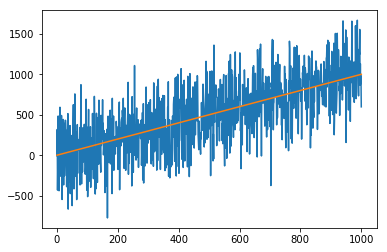

In [8]:
signal = np.linspace(0, 1000, 1001)
noise_portion = 0.1
noisy_signal = add_gaussian_white_noise_by_magnitude(signal, noise_portion)

plt.plot(noisy_signal)
plt.plot(signal)

np.max(noisy_signal - signal), np.min(noisy_signal - signal)

**12.3.3. Computing the population vector**

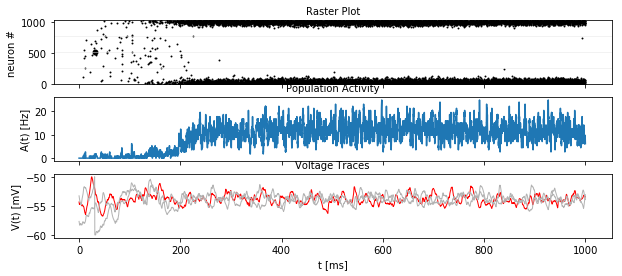

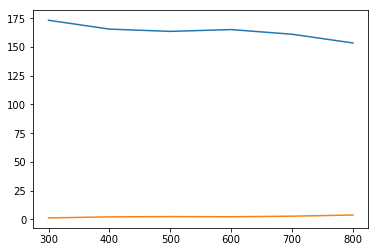

In [9]:
# Example how to create an array of timestamps spaced by snapshot_interval in the interval of interest.
stimulus_center_deg = 360
stimulus_width_deg  = 30
stimulus_strength   = .06 * namp
t_stimulus_start    = 100 * ms
t_stimulus_duration = 200 * ms
sim_time_duration   = 1000. * ms
t_window_width      = 200*ms
snapshot_interval   = 100*ms
N_excitatory = 1024

rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model.simulate_wm(stimulus_center_deg=stimulus_center_deg, stimulus_width_deg=stimulus_width_deg, stimulus_strength=stimulus_strength, t_stimulus_start=t_stimulus_start, t_stimulus_duration=t_stimulus_duration, sim_time=sim_time_duration)
fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * ms)
plt.show()

t_snapshots = range(
    int(math.floor((t_stimulus_start+t_stimulus_duration)/ms)),  # lower bound
    int(math.floor((sim_time_duration-t_window_width/2)/ms)),  # Subtract half window. Avoids an out-of-bound error later.
    int(round(snapshot_interval/ms))  # spacing between time stamps
    )*ms

# how your function get_theta_time_series could be called:
theta_ts = get_theta_time_series(spike_monitor_excit, idx_monitored_neurons_excit, N_excitatory, t_snapshots, t_window_width)
theta_ts_v_a = get_theta_time_series_vec_add(spike_monitor_excit, idx_monitored_neurons_excit, N_excitatory, t_snapshots, t_window_width)
theta_ts_v_a = theta_ts_v_a[1]

# plot theta vs time using pyplot
plt.figure()
plt.plot(t_snapshots/ms, theta_ts)
plt.plot(t_snapshots/ms, theta_ts_v_a)

**12.3.4. Exercise: Visualize the diffusion of the population vector**

Simulate a network of size N_excitatory = 2048. Apply a stimulus from t=100ms to t=300ms. Plot theta(t). Note that when you increase the size of the excitatory population you also have to increase the inhibitory population and the weights (``N_inhibitory'' and ``weight_scaling_factor''). When doubling the number of presynaptic neurons, you have to scale the weights by 0.5 to keep the total synaptic input the same.

In [2]:
def run_trials(num_of_trials         = 20, 
               collected_data_file   = 'Data/collected_drift_trials.npy', 
               stimulus_center_deg   = 180,
               stimulus_width_deg    = 60,
               stimulus_strength     = .06 * namp,
               t_stimulus_start      = 100 * ms,
               t_stimulus_duration   = 200 * ms,
               N_excitatory          = 1024,
               N_inhibitory          = 256,
               weight_scaling_factor = 2.0,
               sim_time_duration     = 10000. * ms,
               t_window_width      = 200*ms,
               snapshot_interval   = 100*ms,
               synaptic_noise_amount = 0.0
              ):
    """
        Runs trials of the activity bump drift and collects corresponding time series
        
        num_of_trials (default 20) : How many trials of the experiment to run. 
        collected_data_file (default 'Data/collected_drift_trials.npy') : File to store collected data in.
        stimulus_center_deg (default 180) : Stimulus heading. 
        
    """
    
    #num_of_trials = 20
    #collected_data_file = 'Data/collected_drift_trials.npy' # The file to store the collected trials data

    # Try to load existing data if any otherwise create an empty collection
    try:
        collected_trials_data = np.load(collected_data_file, allow_pickle=True, encoding='bytes')
    except: 
        collected_trials_data = np.array([]) # Collected trials data records list

    # stimulus_center_deg   = 180
    # stimulus_width_deg    = 60
    # stimulus_strength     = .06 * namp
    # t_stimulus_start      = 100 * ms
    # t_stimulus_duration   = 200 * ms
    #sim_time_duration     = 10000. * ms

    #N_excitatory          = 1024 # 2048
    #N_inhibitory          = 256  # 512
    #weight_scaling_factor = 2.0 # 4.0

    #t_window_width      = 200*ms
    #snapshot_interval   = 100*ms


    for iteration in range(num_of_trials):
        print('Trial: ', iteration+1)
        rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model_modified.simulate_wm(N_excitatory=N_excitatory, N_inhibitory=N_inhibitory, weight_scaling_factor=weight_scaling_factor, stimulus_center_deg=stimulus_center_deg, stimulus_width_deg=stimulus_width_deg, stimulus_strength=stimulus_strength, t_stimulus_start=t_stimulus_start, t_stimulus_duration=t_stimulus_duration, sim_time=sim_time_duration, synaptic_noise_amount = synaptic_noise_amount)
        
        t_snapshots = range(
            int(math.floor((t_stimulus_start+t_stimulus_duration)/ms)),  # lower bound
            int(math.floor((sim_time_duration-t_window_width/2)/ms)),  # Subtract half window. Avoids an out-of-bound error later.
            int(round(snapshot_interval/ms))  # spacing between time stamps
            )*ms
        
        # Calculate the population vector angle theta
        theta_ts = get_theta_time_series_vec_add(spike_monitor_excit, idx_monitored_neurons_excit, N_excitatory, t_snapshots, t_window_width)

        # Create a new dictionary with the collected data
        collected_data = dict()
        # Simulation set up info
        collected_data['stimulus_center_deg'] = stimulus_center_deg
        collected_data['stimulus_width_deg'] = stimulus_width_deg
        collected_data['t_stimulus_start'] = t_stimulus_start
        collected_data['t_stimulus_duration'] = t_stimulus_duration
        collected_data['sim_time_duration'] = sim_time_duration
        collected_data['N_excitatory'] = N_excitatory
        collected_data['N_inhibitory'] = N_inhibitory
        collected_data['weight_scaling_factor'] = weight_scaling_factor
        collected_data['synaptic_noise_amount'] = synaptic_noise_amount

        # Data
        #collected_data['rate_monitor_excit'] = rate_monitor_excit
        collected_data['spike_monitor_excit'] = spike_monitor_excit.spike_trains()
        #collected_data['voltage_monitor_excit'] = voltage_monitor_excit
        collected_data['idx_monitored_neurons_excit'] = idx_monitored_neurons_excit
        #collected_data['rate_monitor_inhib'] = rate_monitor_inhib
        collected_data['spike_monitor_inhib'] = spike_monitor_inhib.spike_trains()
        #collected_data['voltage_monitor_inhib'] = voltage_monitor_inhib
        collected_data['idx_monitored_neurons_inhib'] = idx_monitored_neurons_inhib
        collected_data['theta_ts'] = theta_ts
        # Add new data record to the collected trials data
        collected_trials_data = np.append(collected_trials_data, collected_data)

    # Save all data in the file
    np.save(collected_data_file, collected_trials_data, allow_pickle=True)
    
    fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * ms)
    plt.show()


In [3]:
# Run the trials (Note this will take a long time)

# Network hyper-parameter
# [(N_excitatory, N_inhibitory, weight_scaling_factor), ...]
network_parameters = [
    (1024, 256, 2.0),
    (2048, 512, 1.0),
    (512,  128, 4.0)
]

synaptic_noise_amount_list = [0.01, 0.05, 0.1, 0.5]


# Collect data for three network sizes and 9 stimulus headings
def explore_heading_angles():
    for i, network_param in enumerate(network_parameters):
        for stim_degrees in range(0, 360+1, 45):
            print('Experiment: {:3}  stim_degrees = {:3}'.format(i+1, stim_degrees))
            run_trials(num_of_trials         = 10, 
                       collected_data_file   = collected_data_file, 
                       stimulus_center_deg   = stim_degrees,
                       N_excitatory          = network_param[0],
                       N_inhibitory          = network_param[1],
                       weight_scaling_factor = network_param[2],
                       sim_time_duration     = 10000. * ms,
                       synaptic_noise_amount = 0.0
                      )

# Collect data for three network sizes and different noise levels
def explore_noise_levels():
    for i, network_param in enumerate(network_parameters):
        for synaptic_noise_amount in synaptic_noise_amount_list:
            print('Experiment: {:3}  synaptic_noise_amount = {:3}'.format(i+1, synaptic_noise_amount))
            run_trials(num_of_trials         = 10, 
                       collected_data_file   = collected_data_file, 
                       stimulus_center_deg   = 180,
                       N_excitatory          = network_param[0],
                       N_inhibitory          = network_param[1],
                       weight_scaling_factor = network_param[2],
                       sim_time_duration     = 10000. * ms,
                       synaptic_noise_amount = synaptic_noise_amount
                      )


explore_heading_angles()
explore_noise_levels()

Experiment:   1  stim_degrees =   0


WARNING    /Users/john/Library/Python/2.7/lib/python/site-packages/brian2/units/fundamentalunits.py:207: RuntimeWarning: divide by zero encountered in log10
  return func(np.array(x, copy=False), *args, **kwds)
 [py.warnings]


Trial:  1


KeyboardInterrupt: 

Plot and Explore the collected trial results
-------------------------------------------------

In [38]:
def plot_time_series_list(collected_data_file, 
                          stimulus_center_deg   = None,
                          stimulus_width_deg    = None,
                          sim_time_duration     = None,
                          N_excitatory          = None,
                          synaptic_noise_amount = None,
                          unwrap_modulo_angles  = False
                          ):
    # Example how to create an array of timestamps spaced by snapshot_interval in the interval of interest.
    t_window_width      = 200*ms # was 100*ms
    snapshot_interval   = 100*ms

    time_series_collection = dict()
    
    # Try to load existing data if any otherwise create an empty collection
    try:
        #collected_trials_data = np.load(collected_data_file, allow_pickle=True, encoding='bytes')
        # Load only records with specific values
        collected_trials_data = pick_data_samples(collected_data_file, 
                                stimulus_center_deg   = stimulus_center_deg,
                                stimulus_width_deg    = stimulus_width_deg,
                                sim_time_duration     = sim_time_duration,
                                N_excitatory          = N_excitatory,
                                synaptic_noise_amount = synaptic_noise_amount, 
                                operator              = 'and'
                             )
    except: 
        collected_trials_data = np.array([]) # Collected trials data records list

    theta_ts_list = [] # To store the time series
    
    # We use enumerate to add a count to the iterated items of the iterator
    for i, item in enumerate(collected_trials_data):
        # Simulation set up info
        stimulus_center_deg              = item['stimulus_center_deg']
        stimulus_width_deg               = item['stimulus_width_deg']
        t_stimulus_start                 = item['t_stimulus_start']
        t_stimulus_duration              = item['t_stimulus_duration']
        sim_time_duration                = item['sim_time_duration']
        N_excitatory                     = item['N_excitatory']
        N_inhibitory                     = item['N_inhibitory']
        weight_scaling_factor            = item['weight_scaling_factor']

        # Data
        spike_monitor_excit_spike_trains = item['spike_monitor_excit']
        idx_monitored_neurons_excit      = item['idx_monitored_neurons_excit']
        spike_monitor_inhib_spike_trains = item['spike_monitor_inhib']
        idx_monitored_neurons_inhib      = item['idx_monitored_neurons_inhib']
        t_window_width                   = item['t_window_width']
        snapshot_interval                = item['snapshot_interval']
        theta_ts                         = item['theta_ts']
        t_snapshots                      = item['t_snapshots']

        # The newest version of get_theta_time_series_vec_add(...) returns a tuple (r_time_series, theta_time_series) 
        # Earlier versions were returning only theta_time_series
        if isinstance(theta_ts, tuple):
            theta_ts = theta_ts[1]

        #t_snapshots = range(
        #    int(math.floor((t_stimulus_start+t_stimulus_duration)/ms)),  # lower bound
        #    int(math.floor((sim_time_duration-t_window_width/2)/ms)),  # Subtract half window. Avoids an out-of-bound error later.
        #    int(round(snapshot_interval/ms))  # spacing between time stamps
        #    )*ms

        #theta_ts = get_theta_time_series_vec_add(spike_monitor_excit_spike_trains, idx_monitored_neurons_excit, N_excitatory, t_snapshots, t_window_width)
        
        # Do not limit angles to 0-360 degrees. Convert to increasing or decreasing non wrapping numbers.
        if unwrap_modulo_angles:
            theta_ts = unwrap_modulo_time_series(theta_ts, modulo = 360)
        
        # Store the time series
        theta_ts_list.append(theta_ts)
    
    if len(theta_ts_list) > 0:
        # Calculate the Mean Absolute Deviations (MAD)
        theta_ts_abs_diff_mean = mean_absolute_deviation(expected_value=stimulus_center_deg, time_series_list=theta_ts_list)

        time_series_collection['theta_ts_list']          = theta_ts_list
        time_series_collection['theta_ts_abs_diff_mean'] = theta_ts_abs_diff_mean
        time_series_collection['t_snapshots']            = t_snapshots
        time_series_collection['stimulus_center_deg']    = stimulus_center_deg
        time_series_collection['N_excitatory']           = N_excitatory


        return time_series_collection
    else:
        return None


def pick_angle_data(collected_data_file, stimulus_center_deg_list, N_excitatory = 1024, synaptic_noise_amount = 0, unwrap_modulo_angles = False):
    # Plot collected time series for different stimulus angle locations
    plot_keys_list = stimulus_center_deg_list
    plot_items_dict = dict()
    num_of_plot_keys = len(plot_keys_list)
    viridis = plt.cm.get_cmap('viridis')

    for i,plot_key in enumerate(plot_keys_list):
        plot_item = plot_time_series_list(collected_data_file, 
                                          stimulus_center_deg   = plot_key,
                                          stimulus_width_deg    = None,
                                          sim_time_duration     = None,
                                          N_excitatory          = N_excitatory,
                                          synaptic_noise_amount = synaptic_noise_amount,
                                          unwrap_modulo_angles  = unwrap_modulo_angles
                                         )
        if plot_item is not None:
            plot_item['color']               = viridis(i/num_of_plot_keys)

        plot_items_dict[plot_key] = plot_item
    return plot_items_dict


def pick_noise_data(collected_data_file, synaptic_noise_amount_list, N_excitatory = 2048, stimulus_center_deg = 180, unwrap_modulo_angles = False):
    # Plot collected time series for different stimulus angle locations
    plot_keys_list = synaptic_noise_amount_list
    plot_items_dict = dict()
    num_of_plot_keys = len(plot_keys_list)
    viridis = plt.cm.get_cmap('viridis')

    for i,plot_key in enumerate(plot_keys_list):
        plot_item = plot_time_series_list(collected_data_file, 
                                          stimulus_center_deg   = stimulus_center_deg,
                                          stimulus_width_deg    = None,
                                          sim_time_duration     = None,
                                          N_excitatory          = N_excitatory,
                                          synaptic_noise_amount = plot_key,
                                          unwrap_modulo_angles  = unwrap_modulo_angles
                                         )
        if plot_item is not None:
            plot_item['color']               = viridis(i/num_of_plot_keys)

        plot_items_dict[plot_key] = plot_item
    return plot_items_dict


def pick_net_size_data(collected_data_file, N_excitatory_list, stimulus_center_deg = 180, synaptic_noise_amount = 0, unwrap_modulo_angles = False):
    # Plot collected time series for different stimulus angle locations
    plot_keys_list = N_excitatory_list
    plot_items_dict = dict()
    num_of_plot_keys = len(plot_keys_list)
    viridis = plt.cm.get_cmap('viridis')

    for i,plot_key in enumerate(plot_keys_list):
        plot_item = plot_time_series_list(collected_data_file, 
                                          stimulus_center_deg   = stimulus_center_deg,
                                          stimulus_width_deg    = None,
                                          sim_time_duration     = None,
                                          N_excitatory          = plot_key,
                                          synaptic_noise_amount = synaptic_noise_amount,
                                          unwrap_modulo_angles  = unwrap_modulo_angles
                                         )
        if plot_item is not None:
            plot_item['color']               = viridis(i/num_of_plot_keys)

        plot_items_dict[plot_key] = plot_item
    return plot_items_dict


def calc_theta_mean_absolute_deviation_rate(plot_items_dict, plot_keys_list, start_time=0, end_time=1):
    if isinstance(start_time, Quantity):
        start_time = start_time / second
    if isinstance(end_time, Quantity):
        end_time = end_time / second
    
    for plot_key in plot_keys_list:
        plot_item = plot_items_dict[plot_key]
        if plot_item is not None:
            theta_ts_abs_diff_mean = plot_item['theta_ts_abs_diff_mean']
            t_snapshots = plot_item['t_snapshots']

            if isinstance(t_snapshots, Quantity):
                t_snapshots = t_snapshots / second

            index_start_time = np.argmax(t_snapshots >= start_time)
            index_end_time = np.argmin(t_snapshots <= end_time)
            
            theta_ts_abs_diff_mean_segment = theta_ts_abs_diff_mean[index_start_time:index_end_time]
            delta_theta_ts_abs_diff_mean_segment = np.max(theta_ts_abs_diff_mean_segment) - np.min(theta_ts_abs_diff_mean_segment)
            delta_time = end_time - start_time
            
            theta_mean_absolute_deviation_rate = delta_theta_ts_abs_diff_mean_segment / delta_time
            plot_items_dict[plot_key]['theta_mean_absolute_deviation_rate'] = theta_mean_absolute_deviation_rate
    
    return plot_items_dict

def print_theta_mean_absolute_deviation_rate(plot_items_dict, plot_keys_list, plot_key_str, plot_key_units):
    c1w = max(len(plot_key_str), len(plot_key_units))
    print(('{:^'+str(c1w)+'} {:^10}').format(plot_key_str,  'Drift rate'))
    print(('{:^'+str(c1w)+'} {:^10}').format(plot_key_units, '(°/s)'))
    for plot_key in plot_keys_list:
        plot_item = plot_items_dict[plot_key]
        if plot_item is not None:
            theta_mean_absolute_deviation_rate = plot_item['theta_mean_absolute_deviation_rate']
            print(('{:'+str(c1w)+'} {:10}').format(plot_key, theta_mean_absolute_deviation_rate))


def plot_theta_mean_absolute_deviation_rate(plot_items_dict, plot_keys_list, plot_key_str, plot_key_units):
    pass


def plot_data(plot_items_dict, plot_keys_list, plot_key_units, xlim=None, ylim1=[0, 360], ylim2=None, title=None):
    # Plot all the individual time series recordings
    plt.figure()
    for plot_key in plot_keys_list:
        plot_item = plot_items_dict[plot_key]
        if plot_item is not None:
            color = plot_item['color']
            theta_ts_list = plot_item['theta_ts_list']
            theta_ts_abs_diff_mean = plot_item['theta_ts_abs_diff_mean']
            t_snapshots = plot_item['t_snapshots']
            # print(plot_key, plot_item['plot_key'])
            for i,theta_ts_item in enumerate(theta_ts_list):
                # print(plot_key, plot_item['plot_key'], t_snapshots.shape, len(theta_ts_item))
                # plot theta vs time using pyplot
                if i == 0:
                    plt.plot(t_snapshots/second, theta_ts_item, color=mcolors.to_rgba(color, alpha=0.2), label=str(plot_key)+plot_key_units)
                else:
                    plt.plot(t_snapshots/second, theta_ts_item, color=mcolors.to_rgba(color, alpha=0.2))
            plt.xlabel('Time (s)')
            plt.ylabel('Heading ($^{o}$)')
            if title: plt.title(title)
            if ylim1: plt.ylim(ylim1)
            if xlim: plt.xlim(xlim)
            plt.legend()
            #plt.show()

    # Plot the Mean Absolute Deviation of the time series across time
    plt.figure()
    for plot_key in plot_keys_list:
        plot_item = plot_items_dict[plot_key]
        if plot_item is not None:
            color = plot_item['color']
            theta_ts_list = plot_item['theta_ts_list']
            theta_ts_abs_diff_mean = plot_item['theta_ts_abs_diff_mean']
            t_snapshots = plot_item['t_snapshots']

            plt.plot(t_snapshots/second, theta_ts_abs_diff_mean, color=mcolors.to_rgba(color, alpha=1), label=str(plot_key)+plot_key_units)
            #plt.ylim([0,360]) # Show the whole range of angles
            plt.xlabel('Time (s)')
            plt.ylabel('Mean Absolute Deviation ($^{o}$)')
            if title: plt.title(title)
            if ylim2: plt.ylim(ylim2)
            if xlim: plt.xlim(xlim)
            plt.legend()

#collected_data_file = 'Data/collected_drift_trials.npy'
#collected_data_file = 'Data/collected_drift_trials_v2_noise.npy'
#collected_data_file = 'Data/collected_drift_trials_v2_noise_Ne2048.npy'
#collected_data_file = 'Data/collected_drift_trials_v2_angles.npy'
#collected_data_file = 'Data/collected_drift_trials_v2_all.npy'



Display some info about the dataset

In [7]:
#collected_data_file = 'Data/collected_drift_trials.npy'
#collected_data_file = 'Data/collected_drift_trials_v2_angles.npy'
#collected_data_file = 'Data/collected_drift_trials_v2_Ne512_noise.npy'
#collected_data_file = 'Data/collected_drift_trials_v2_noise_Ne2048.npy'
#collected_data_file = 'Data/collected_drift_trials_v2_Ne4096_noise.npy'
collected_data_file = 'Data/collected_drift_trials_v2_all.npy'
#collected_data_file = 'Data/collected_drift_trials_v3_all.npy'

# Try to load existing data if any otherwise create an empty collection
try:
    collected_trials_data = np.load(collected_data_file, allow_pickle=True, encoding='bytes')
except: 
    collected_trials_data = np.array([]) # Collected trials data records list

loaded_data_items_list = []


# Iterate over all records in the loaded data file and create 
# tupple entries with elements the values of interest. 
for i, item in enumerate(collected_trials_data):
    # Iterate over function arguments
    loaded_data_items_list.append((
        item.get('N_excitatory', -1), 
        item.get('stimulus_center_deg', -1), 
        item.get('synaptic_noise_amount', -1),
        item.get('N_inhibitory', -1),
        item.get('weight_scaling_factor', -1),
        item.get('stimulus_width_deg', -1),
        item.get('sim_time_duration', -1*second) / second
    ))

loaded_data_items_set = set(loaded_data_items_list)

loaded_data_items_list_sorted = sorted(list(loaded_data_items_set), key=lambda tup: (tup[0], tup[1], tup[2]))

print('{:3} {:11} {}'.format('A/A', 'Items Count', 'Value'))
for i,item in enumerate(loaded_data_items_list_sorted):
    num_of_items = 0
    for item2 in loaded_data_items_list:
        if item == item2:
            num_of_items += 1
    print('{:3} {:^11} {}'.format(i, num_of_items, item))



A/A Items Count Value


### Dispersion when starting at different attractor states

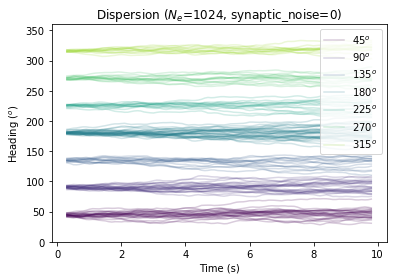

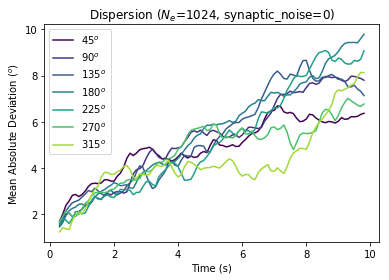

In [12]:
collected_data_file = 'Data/collected_drift_trials_v2_all.npy'
plot_keys_list = [45, 90, 135, 180, 225, 270, 315]
plot_key_units = '$^{o}$'
N_excitatory = 1024
synaptic_noise_amount = 0
plot_items_dict = pick_angle_data(collected_data_file, 
                                  plot_keys_list, 
                                  N_excitatory = N_excitatory, 
                                  synaptic_noise_amount = synaptic_noise_amount)
plot_data(plot_items_dict, plot_keys_list, plot_key_units, 
          title='Dispersion ($N_e$=' + str(N_excitatory) + ', synaptic_noise=' + str(synaptic_noise_amount) + ')')

### Dispersion for different network sizes

In [13]:
plot_keys_list = [0.01, 0.05, 0.1, 0.5]
plot_keys_list = [0.01, 0.05, 0.1]
plot_key_units = ' 1/SNR'
N_excitatory = 1024
stimulus_center_deg = 180
plot_items_dict = pick_noise_data(collected_data_file, 
                                  plot_keys_list, 
                                  N_excitatory = N_excitatory, 
                                  stimulus_center_deg = stimulus_center_deg)
plot_data(plot_items_dict, plot_keys_list, plot_key_units, 
          xlim=[0, 1.5],
          title='Effect of Noise on Dispersion ($N_e$=' + str(N_excitatory) + ')')

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

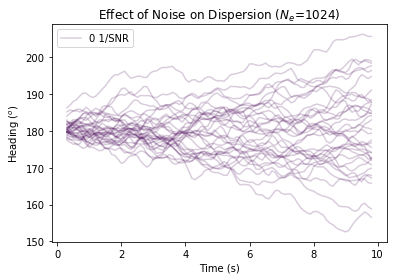

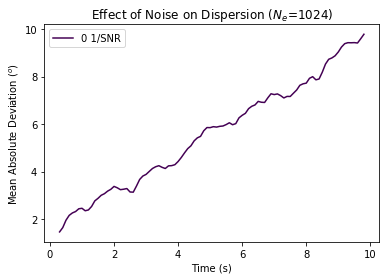

In [14]:
# The same with unwrapped modulo angles
plot_keys_list = [0, 0.01, 0.05, 0.1, 0.5]
#plot_keys_list = [0.01, 0.05, 0.1]
plot_key_units = ' 1/SNR'
N_excitatory = 1024
stimulus_center_deg = 180
plot_items_dict = pick_noise_data(collected_data_file, 
                                  plot_keys_list, 
                                  N_excitatory = N_excitatory, 
                                  stimulus_center_deg = stimulus_center_deg,
                                  unwrap_modulo_angles = True)
plot_data(plot_items_dict, plot_keys_list, plot_key_units, 
          #xlim=[0, 1.5],
          ylim1 = None, #[-200, 1000],
          ylim2 = None, #[0, 100],
          title='Effect of Noise on Dispersion ($N_e$=' + str(N_excitatory) + ')')

### Effect of Net Size on Dispersion

Synaptic noise = 0

Synaptic noise = 0


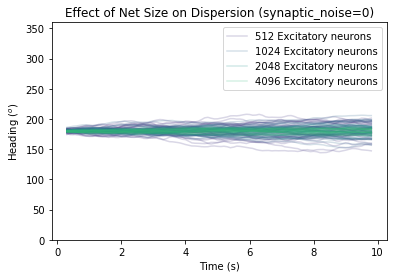

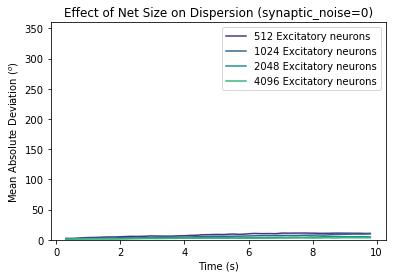

In [19]:
collected_data_file = 'Data/collected_drift_trials_v2_all.npy'
#collected_data_file = 'Data/collected_drift_trials_v3_all.npy'
plot_keys_list = [128, 512, 1024, 2048, 4096, 8192]
plot_key_units = ' Excitatory neurons'
stimulus_center_deg = 180
synaptic_noise_amount = 0
print('Synaptic noise = {}'.format(synaptic_noise_amount))
plot_items_dict = pick_net_size_data(collected_data_file, 
                                     plot_keys_list, 
                                     stimulus_center_deg = stimulus_center_deg, 
                                     synaptic_noise_amount = synaptic_noise_amount,
                                     unwrap_modulo_angles = True)
plot_data(plot_items_dict, plot_keys_list, plot_key_units, 
          ylim2=[0, 360], 
          title='Effect of Net Size on Dispersion (synaptic_noise=' + str(synaptic_noise_amount) + ')')

Synaptic noise = 0.01

Synaptic noise = 0.01


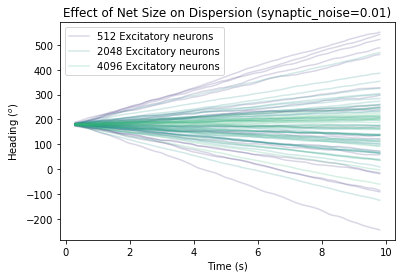

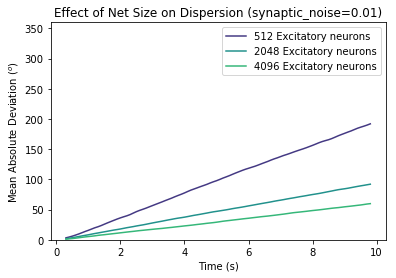

In [20]:
plot_keys_list = [128, 512, 1024, 2048, 4096, 8192]
plot_key_units = ' Excitatory neurons'
stimulus_center_deg = 180
synaptic_noise_amount = 0.01
print('Synaptic noise = {}'.format(synaptic_noise_amount))
plot_items_dict = pick_net_size_data(collected_data_file, 
                                     plot_keys_list, 
                                     stimulus_center_deg = stimulus_center_deg, 
                                     synaptic_noise_amount = synaptic_noise_amount,
                                     unwrap_modulo_angles = True)
plot_data(plot_items_dict, plot_keys_list, plot_key_units, 
          #xlim=[0, 2],
          ylim1=None,
          ylim2=[0, 360], 
          title='Effect of Net Size on Dispersion (synaptic_noise=' + str(synaptic_noise_amount) + ')')

Synaptic noise = 0.1

Synaptic noise = 0.1


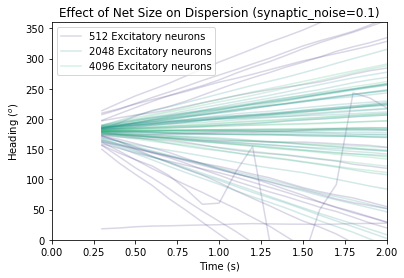

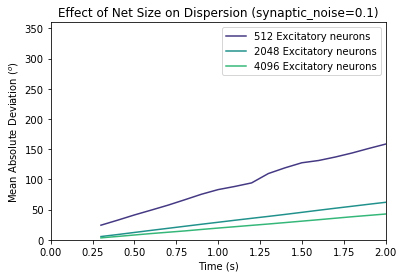

In [21]:
plot_keys_list = [128, 512, 1024, 2048, 4096, 8192]
plot_key_units = ' Excitatory neurons'
stimulus_center_deg = 180
synaptic_noise_amount = 0.1
print('Synaptic noise = {}'.format(synaptic_noise_amount))
plot_items_dict = pick_net_size_data(collected_data_file, 
                                     plot_keys_list, 
                                     stimulus_center_deg = stimulus_center_deg, 
                                     synaptic_noise_amount = synaptic_noise_amount,
                                     unwrap_modulo_angles = True)
plot_data(plot_items_dict, plot_keys_list, plot_key_units, 
          xlim=[0, 2],
          ylim2=[0, 360], 
          title='Effect of Net Size on Dispersion (synaptic_noise=' + str(synaptic_noise_amount) + ')')

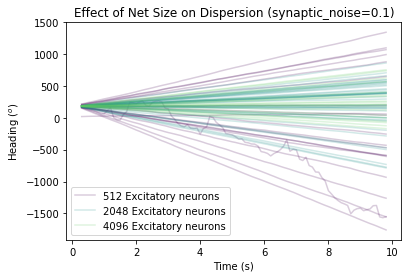

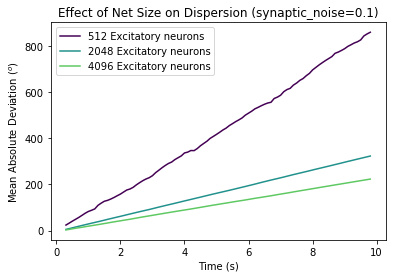

In [37]:
# The same with unwrapped modulo angles
plot_keys_list = [128, 512, 1024, 2048, 4096]
plot_key_units = ' Excitatory neurons'
stimulus_center_deg = 180
synaptic_noise_amount = 0.1
plot_items_dict = pick_net_size_data(collected_data_file, 
                                     plot_keys_list, 
                                     stimulus_center_deg = stimulus_center_deg, 
                                     synaptic_noise_amount = synaptic_noise_amount,
                                     unwrap_modulo_angles = True)
plot_data(plot_items_dict, plot_keys_list, plot_key_units, 
          #xlim=[0, 2],
          ylim1 = None,
          #ylim2 = [0, 120],
          title='Effect of Net Size on Dispersion (synaptic_noise=' + str(synaptic_noise_amount) + ')')

In [39]:
plot_keys_list = [128, 512, 1024, 2048, 4096, 8192]
plot_key_units = ' Excitatory neurons'
stimulus_center_deg = 180
synaptic_noise_amount_list = [0, 0.01, 0.1]
for synaptic_noise_amount in synaptic_noise_amount_list:
    print('Synaptic noise = {}'.format(synaptic_noise_amount))
    plot_items_dict = pick_net_size_data(collected_data_file, 
                                         plot_keys_list, 
                                         stimulus_center_deg = stimulus_center_deg, 
                                         synaptic_noise_amount = synaptic_noise_amount,
                                         unwrap_modulo_angles = True)


    plot_items_dict = calc_theta_mean_absolute_deviation_rate(plot_items_dict, plot_keys_list, start_time=0, end_time=5)
    print_theta_mean_absolute_deviation_rate(plot_items_dict, plot_keys_list, plot_key_str='Neurons', plot_key_units='number')
    #print_theta_mean_absolute_deviation_rate(plot_items_dict, plot_keys_list, plot_key_str='Noise', plot_key_units='(1/SNR)')

Synaptic noise = 0
Neurons Drift rate
number    (°/s)   
    512 1.3185693299
   1024 0.87890962587
   2048 0.536384020783
   4096 0.387922131291
Synaptic noise = 0.01
Neurons Drift rate
number    (°/s)   
    512 18.9201136862
   2048 9.07427971096
   4096 5.61308074473
Synaptic noise = 0.1
Neurons Drift rate
number    (°/s)   
    512 78.6017122927
   2048 31.3078649206
   4096 21.9080640838


Adding noise
---------------

Variables of interest 
presyn_weight_kernel
Jpos_excit2excit
Jneg_excit2excit

andpossibly the weight variables of the inputs input_ext2excit and input_ext2inhib

$tmp = \sqrt{2\pi} \times sigma\_weight\_profile \times \frac{erf(\frac{\frac{180}{\sqrt{2}}}{sigma\_weight\_profile})}{360}$

$J_{neg\_excit2excit} = \frac{1 - J_{pos\_excit2excit} \times tmp}{1 - tmp}$


$for ~ j ~ in ~ (0, N_{excitatory}): \\ ~~~~ presyn\_weight\_kernel_j = J_{neg\_excit2excit} +  (J_{pos\_excit2excit} - J_{neg\_excit2excit}) * 
exp(\frac{-0.5 \times (\frac{360 \times min(j, N_{excitatory} - j)}{N_{excitatory}})^2}{sigma\_weight\_profile^2)})
$


    tmp = math.sqrt(2. * math.pi) * sigma_weight_profile * erf(180. / math.sqrt(2.) / sigma_weight_profile) / 360.
    Jneg_excit2excit = (1. - Jpos_excit2excit * tmp) / (1. - tmp)
    presyn_weight_kernel = \
        [(Jneg_excit2excit +
          (Jpos_excit2excit - Jneg_excit2excit) *
          math.exp(-.5 * (360. * min(j, N_excitatory - j) / N_excitatory) ** 2 / sigma_weight_profile ** 2))
         for j in range(N_excitatory)]


With noise
----------

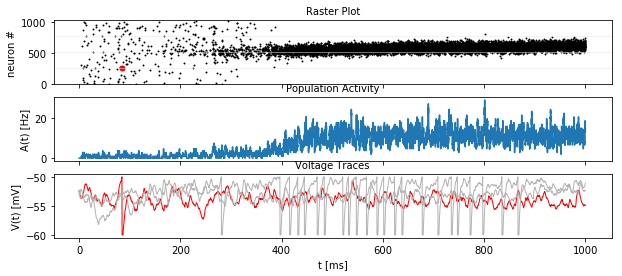

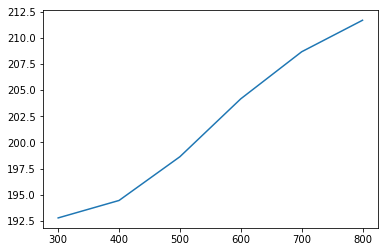

In [7]:
# Example how to create an array of timestamps spaced by snapshot_interval in the interval of interest.
stimulus_center_deg = 180
stimulus_width_deg  = 30
stimulus_strength   = .06 * namp
t_stimulus_start    = 100 * ms
t_stimulus_duration = 200 * ms
sim_time_duration   = 1000. * ms
t_window_width      = 200*ms
snapshot_interval   = 100*ms
N_excitatory = 1024
synaptic_noise_amount = 0.1

rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, idx_monitored_neurons_excit, rate_monitor_inhib, spike_monitor_inhib, voltage_monitor_inhib, idx_monitored_neurons_inhib, w_profile = wm_model_modified.simulate_wm(stimulus_center_deg=stimulus_center_deg, stimulus_width_deg=stimulus_width_deg, stimulus_strength=stimulus_strength, t_stimulus_start=t_stimulus_start, t_stimulus_duration=t_stimulus_duration, sim_time=sim_time_duration, synaptic_noise_amount=synaptic_noise_amount)
fig, ax_raster, ax_rate, ax_voltage = plot_tools.plot_network_activity(rate_monitor_excit, spike_monitor_excit, voltage_monitor_excit, t_min=0. * ms)
plt.show()

t_snapshots = range(
    int(math.floor((t_stimulus_start+t_stimulus_duration)/ms)),  # lower bound
    int(math.floor((sim_time_duration-t_window_width/2)/ms)),  # Subtract half window. Avoids an out-of-bound error later.
    int(round(snapshot_interval/ms))  # spacing between time stamps
    )*ms

# how your function get_theta_time_series could be called:
#theta_ts = get_theta_time_series(spike_monitor_excit, idx_monitored_neurons_excit, N_excitatory, t_snapshots, t_window_width)
theta_ts_v_a = get_theta_time_series_vec_add(spike_monitor_excit, idx_monitored_neurons_excit, N_excitatory, t_snapshots, t_window_width)
theta_ts_v_a = theta_ts_v_a[1]

# plot theta vs time using pyplot
plt.figure()
#plt.plot(t_snapshots/ms, theta_ts)
plt.plot(t_snapshots/ms, theta_ts_v_a)